In this project, I build models to predict customers that is at high risk of churn.


# Data Description

[The Telco customer churn data](https://www.kaggle.com/blastchar/telco-customer-churn) contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
- Customers who left within the last month – the column is called Churn.
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# Overview

**1. Understand the nature of data (Histograms, boxplots, etc.)**

**2. Data Cleaning**

**3. Data Exploration**

**4. Feature Engineering**

**5. Data Preprocessing for Models**

**6. Basic Model Building**

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data

In [ ]:
# load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# quickly look at our data fields, datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


I'd like to look at the provided **Attribute Information**.

|Field name | Description |
|--|--|
| ***customerID*** | Customer ID |
| ***gender*** | Whether the customer is a male or a female |
| ***SeniorCitizen*** | Whether the customer is a senior citizen or not *(1, 0)* |
| ***Partner*** | Whether the customer has a partner or not *(Yes, No)* |
| ***Dependents*** | Whether the customer has dependents or not *(Yes, No)* |
| ***tenure*** | Number of months the customer has stayed with the company |
| ***PhoneService*** | Whether the customer has a phone service or not *(Yes, No)* |
| ***MultipleLines*** | Whether the customer has multiple lines or not *(Yes, No, No phone service)* |
| ***InternetService*** | Customer’s internet service provider *(DSL, Fiber optic, No)* |
| ***OnlineSecurity*** | Whether the customer has online security or not *(Yes, No, No internet service)* |
| ***OnlineBackup*** | Whether the customer has online backup or not *(Yes, No, No internet service)* |
| ***DeviceProtection*** | Whether the customer has device protection or not *(Yes, No, No internet service)* |
| ***TechSupport*** | Whether the customer has tech support or not *(Yes, No, No internet service)* |
| ***StreamingTV*** | Whether the customer has streaming TV or not *(Yes, No, No internet service)* |
| ***StreamingMovies*** | Whether the customer has streaming movies or not *(Yes, No, No internet service)* |
| ***Contract*** | The contract term of the customer *(Month-to-month, One year, Two year)* |
| ***PaperlessBilling*** | Whether the customer has paperless billing or not *(Yes, No)* |
| ***PaymentMethod*** | The customer’s payment method *(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))* |
| ***MonthlyCharges*** | The amount charged to the customer monthly |
| ***TotalCharges*** | The total amount charged to the customer |
| ***Churn*** | Whether the customer churned or not *(Yes or No)* |


As the provided information, column `TotalCharges` should be in *float* datatype. However, pandas has currently read this column as *object* datatype. There are some abnormal values that pandas cannot convert to *float* datatype while reading the .csv file.

I will detect what those abnormal values are.

In [ ]:
# detect values that cannot be float in column `TotalCharges`
def detect_abnormality(x, abnormal_values):
  try:
    float(x)
  except:
    abnormal_values.append(x)
  
abnormal_values = []
df['TotalCharges'].apply(detect_abnormality, args=(abnormal_values, ))

abnormal_values

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

There are some missing values that is represented as a whitespace in column `TotalCharges`. I will remove those rows with these abonormal values.

In [ ]:
# remove abnormal values in column `TotalCharges`
df = df.loc[~ df['TotalCharges'].isin(set(abnormal_values))]

In [ ]:
# convert values in column `TotalCharges` to float
df = df.astype({
    'TotalCharges': float,
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Data Exploration

In [ ]:
# check duplicated customers
print(any(df['customerID'].duplicated()))

False


In [ ]:
# to better understand numeric data, 
# we uses .describe() method 
# which gives us understanding of the central tendencies of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# quickly get numeric columns
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
# look at numeric and categorical variable separately
df_num = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
df_cat = df[df.columns.difference(['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID'])]

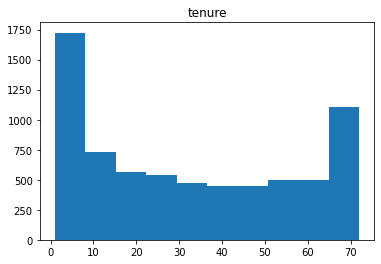

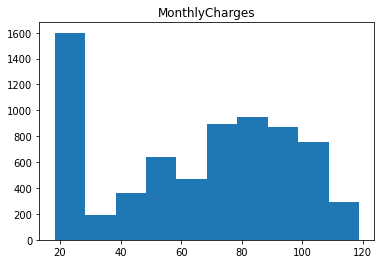

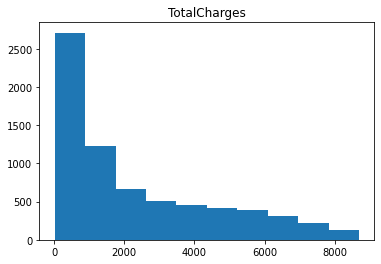

In [ ]:
#distributions for all numeric variables 
for c in df_num.columns:
    plt.hist(df_num[c])
    plt.title(c)
    plt.show()

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


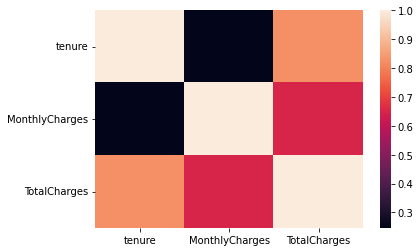

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [ ]:
# compare churn rate across numeric variables
pd.pivot_table(df, index = 'Churn', values = df_num.columns)

,MonthlyCharges,TotalCharges,tenure
Churn,,,
No,61.307408,2555.344141,37.650010
Yes,74.441332,1531.796094,17.979133


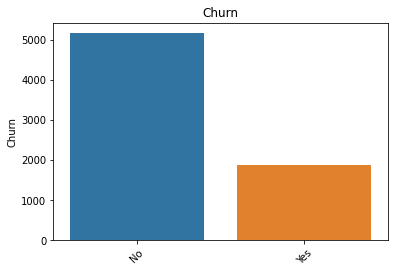

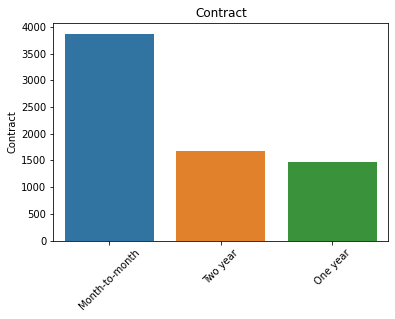

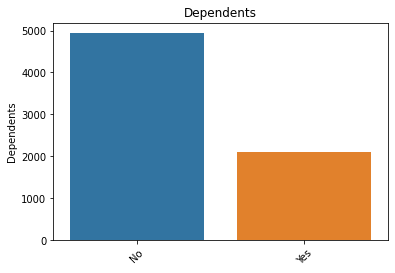

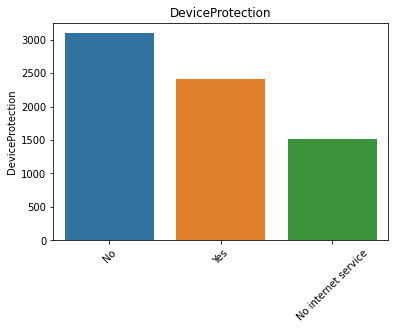

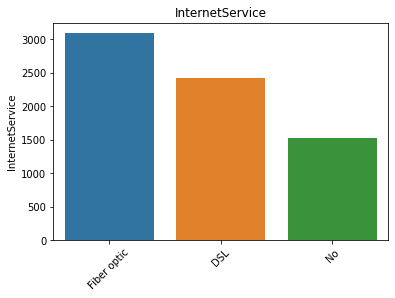

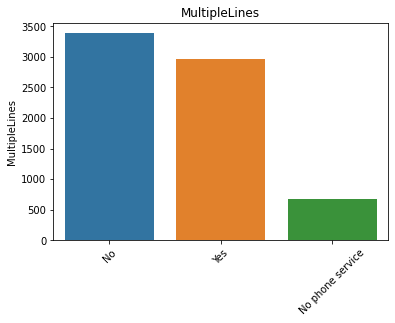

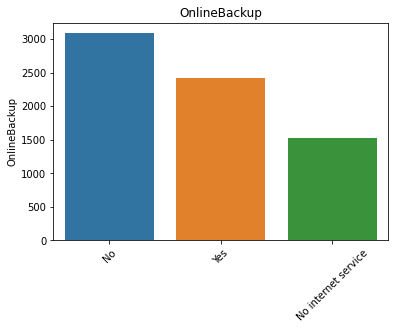

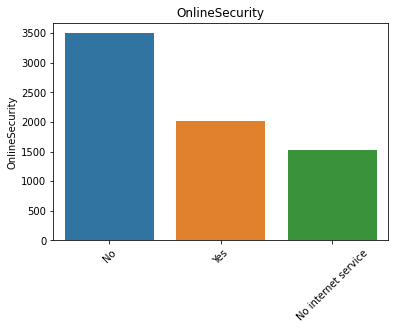

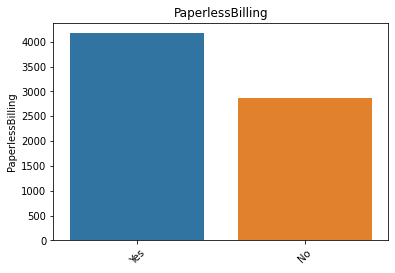

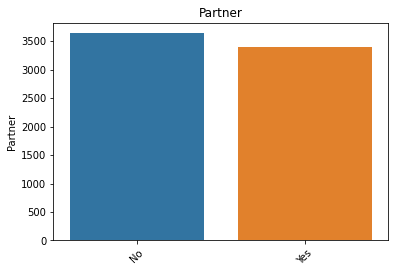

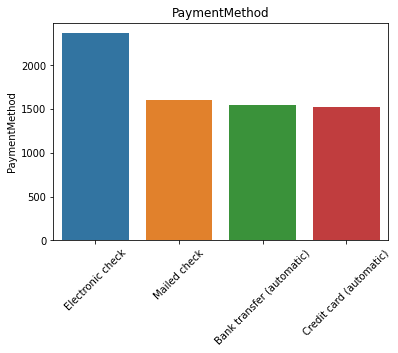

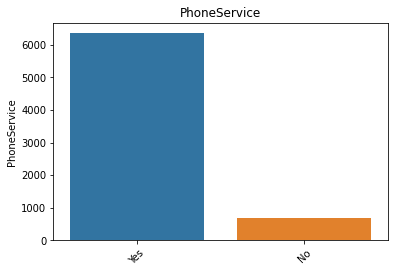

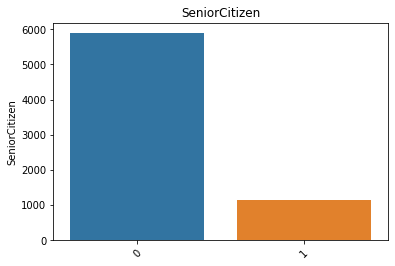

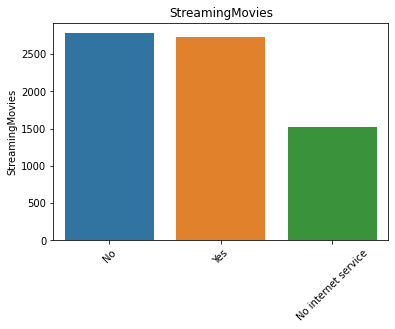

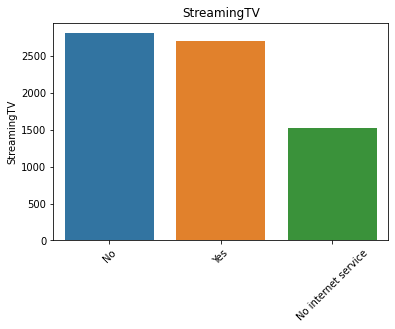

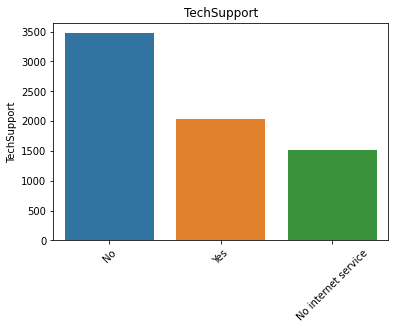

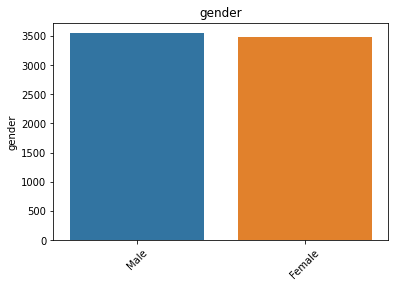

In [ ]:
for c in df_cat.columns:
    sns.barplot(
        x = df_cat[c].value_counts().index, 
        y = df_cat[c].value_counts(),
    ).set_title(c)
    
    plt.xticks(rotation=45)
    plt.show()
    

In [ ]:
# calculate churn rate
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

print(f"Churn rate: {df['Churn'].mean() * 100}")

Churn rate: 26.578498293515356


According to [Profitwell](https://www.profitwell.com/customer-retention/industry-rates), the average churn rate in telecom businesses is about 22%. Our business got ~27% churn rate. It's a high enough churn rate that the business should take efforts to improve retain customers.

In [ ]:
# Comparing churn rate and each of categorical variables

pd.set_option("display.max_rows", None, "display.max_columns", None)

for c in df_cat.columns.difference(['Churn']):
  display(pd.pivot_table(
      df, 
      index = 'Churn', 
      columns = c, 
      values = 'customerID',
      aggfunc ='count')
  )
  
  print()

Contract,Month-to-month,One year,Two year
Churn,,,
0,2220,1306,1637
1,1655,166,48


Dependents,No,Yes
Churn,,
0,3390,1773
1,1543,326


DeviceProtection,No,No internet service,Yes
Churn,,,
0,1883,1407,1873
1,1211,113,545


InternetService,DSL,Fiber optic,No
Churn,,,
0,1957,1799,1407
1,459,1297,113


MultipleLines,No,No phone service,Yes
Churn,,,
0,2536,510,2117
1,849,170,850


OnlineBackup,No,No internet service,Yes
Churn,,,
0,1854,1407,1902
1,1233,113,523


OnlineSecurity,No,No internet service,Yes
Churn,,,
0,2036,1407,1720
1,1461,113,295


PaperlessBilling,No,Yes
Churn,,
0,2395,2768
1,469,1400


Partner,No,Yes
Churn,,
0,2439,2724
1,1200,669


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
0,1284,1289,1294,1296
1,258,232,1071,308


PhoneService,No,Yes
Churn,,
0,510,4653
1,170,1699


SeniorCitizen,0,1
Churn,,
0,4497,666
1,1393,476


StreamingMovies,No,No internet service,Yes
Churn,,,
0,1843,1407,1913
1,938,113,818


StreamingTV,No,No internet service,Yes
Churn,,,
0,1867,1407,1889
1,942,113,814


TechSupport,No,No internet service,Yes
Churn,,,
0,2026,1407,1730
1,1446,113,310


gender,Female,Male
Churn,,
0,2544,2619
1,939,930


# Model Building

## Feature Engineering

In [ ]:
# make a copy of data using for ANN model
ann_df = df.copy()

In [ ]:
df_num.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
# look at the distribution of numeric variables
ann_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# stardardize numeric variables
ann_df['MonthlyCharges'] = (
    ann_df['MonthlyCharges'] - ann_df['MonthlyCharges'].mean()
    ) /ann_df['MonthlyCharges'].std()

ann_df['TotalCharges'] = (
    ann_df['TotalCharges'] - ann_df['TotalCharges'].mean()
    ) /ann_df['TotalCharges'].std()

ann_df['tenure'] = (ann_df['tenure'] - ann_df['tenure'].mean())/ann_df['tenure'].std()

In [ ]:
ann_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.028756e-16,-1.356108e-15,-1.724951e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.547173e+00,-9.989982e-01
25%,-9.542285e-01,-9.709078e-01,-8.301898e-01
50%,-1.394072e-01,1.845309e-01,-3.907873e-01
75%,9.198605e-01,8.330889e-01,6.667797e-01
max,1.612459e+00,1.793254e+00,2.824061e+00


In [ ]:
df_cat.columns

Index(['Churn', 'Contract', 'Dependents', 'DeviceProtection',
       'InternetService', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity',
       'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService',
       'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport',
       'gender'],
      dtype='object')

In [ ]:
# look through the number of unique values in each categorical variables
df_cat.nunique()

Churn               2
Contract            3
Dependents          2
DeviceProtection    3
InternetService     3
MultipleLines       3
OnlineBackup        3
OnlineSecurity      3
PaperlessBilling    2
Partner             2
PaymentMethod       4
PhoneService        2
SeniorCitizen       2
StreamingMovies     3
StreamingTV         3
TechSupport         3
gender              2
dtype: int64

In [ ]:
# one-hot encoding categorical variables
ann_df = pd.get_dummies(ann_df, columns=df_cat.columns.difference(['Churn']))
ann_df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Partner_No,Partner_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,SeniorCitizen_0,SeniorCitizen_1,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male
0,7590-VHVEG,-1.280157,-1.161611,-0.994123,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1,5575-GNVDE,0.064298,-0.260859,-0.173727,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,-1.239416,-0.363897,-0.959581,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1
3,7795-CFOCW,0.512450,-0.747797,-0.195234,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1
4,9237-HQITU,-1.239416,0.196164,-0.940391,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
ann_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   tenure                                   7032 non-null   float64
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   Contract_Month-to-month                  7032 non-null   uint8  
 6   Contract_One year                        7032 non-null   uint8  
 7   Contract_Two year                        7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  DeviceProtection_No                      7032 no

In [ ]:
# train-test split

from sklearn.model_selection import train_test_split

target_var = 'Churn'
features = list(ann_df.columns.difference(['customerID', target_var]))

X_train, X_test, y_train, y_test = train_test_split(
    ann_df[features], 
    ann_df[target_var], 
    test_size=0.3
)

## Model Building

In [ ]:
# build a one hidden layer neural network

from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(16, input_dim=len(features), activation='relu'))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
ann.fit(X_train, y_train, epochs=50, batch_size=100)

In [ ]:
# evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score

in_sample_preds = [round(x[0]) for x in ann.predict(X_train)]
out_sample_preds = [round(x[0]) for x in ann.predict(X_test)]

# Accuracy
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

# Precision
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

# Recall
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8149
Out-of-Sample Accuracy: 0.7995
In-Sample Precision: 0.7143
Out-of-Sample Precision: 0.6468
In-Sample Recall: 0.5233
Out-of-Sample Recall: 0.4806


In [ ]:
# compute AUC (Area Under the Curve)

from sklearn.metrics import roc_curve, auc

in_sample_preds = [x[0] for x in ann.predict(X_train)]
out_sample_preds = [x[0] for x in ann.predict(X_test)]

in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8666
Out-Sample AUC: 0.8403


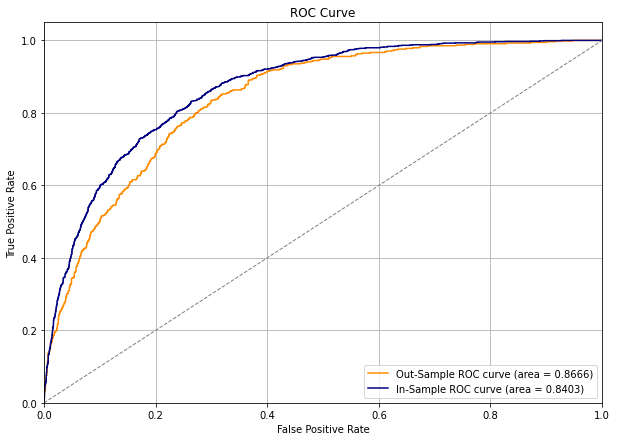

In [ ]:
# visualize results via ROC curve
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()